In [27]:
import numpy as np
import os
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import BatchNormalization, GlobalAveragePooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import shuffle
from openpyxl import load_workbook
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [28]:
size = 224
def read_image(f):
    image = load_img(f, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    image = preprocess_input(image)    
    return(image)

In [29]:
size = 224
traindata_folderPath = 'TrainData_Augmentation\\'
validdata_folderPath = 'ValidationData_Augmentation\\'
testdata_folderpath='TestingData_Augmentation\\'
columnName = 'pvd'
excelFileName = "Perron_phenotype-GSU-training.xlsx"
sheetName = 'Total Database'
imgPat = 'PIL-55a_3dayLBCR-3'

In [30]:
train_filelist= [file for file in os.listdir(traindata_folderPath) if file.endswith('.jpeg')]
valid_filelist= [file for file in os.listdir(validdata_folderPath) if file.endswith('.jpeg')]
test_filelist= [file for file in os.listdir(testdata_folderpath) if file.endswith('.jpeg')]

In [31]:
n_files = len(train_filelist)
print('Total number of files in directory:', n_files)
n_files = len(valid_filelist)
print('Total number of files in directory:', n_files)
n_files = len(test_filelist)
print('Total number of files in directory:', n_files)

Total number of files in directory: 1847
Total number of files in directory: 637
Total number of files in directory: 518


In [32]:
wb = load_workbook(excelFileName)

In [33]:
sheet = wb[sheetName]

In [34]:
def getColumnNumber(columnName, sheet):
    reqColNum = -1
    maxColNumber = sheet.max_column + 1
    for x in range(1, maxColNumber):
        cellValue = sheet.cell(row=1, column=x).value
        if(cellValue == columnName):
                reqColNum = x
                break
    return(reqColNum)

In [35]:
import re
def getStrainNumber(imageName):
    strt = imageName.find('-')
    end = imageName.find('_')
    imgNam = imageName[strt+1:end]
    
    imgNam = re.sub(r'[a-z]', '', imgNam)
    return(imgNam)

In [36]:
def getRowNumber(strainNumber, sheet, columnNumber):
    
    reqRowNum = -1
    maxRowNumber = sheet.max_row + 1
    strainNumbr = float(strainNumber)
    
    for x in range(1, maxRowNumber):
        cellVal = sheet.cell(row=x, column=columnNumber).value
        try:
            cellValue = float(cellVal)            
            if(cellValue == strainNumbr):
                reqRowNum = x
                break
        except ValueError:
            continue
    return(reqRowNum) 

In [37]:
colNumber = getColumnNumber(columnName, sheet)

In [38]:
print(colNumber)

9


In [39]:
strainColumnNumber = getColumnNumber('strain', sheet)

In [40]:
X_Train = []
Y_Train = []
print('Reading train images ...')
for file in train_filelist:
    imagepath = os.path.join(traindata_folderPath, file)
    im = read_image(imagepath)
    #print(im.shape)
    req_ColNumber = colNumber
    req_rowNumber = getRowNumber(getStrainNumber(file),sheet,strainColumnNumber)
    try:
        if(req_rowNumber>0 and req_ColNumber>0):
            req_CellValue = sheet.cell(row=req_rowNumber, column=req_ColNumber).value
            X_Train.append(im)
            Y_Train.append(req_CellValue)
    except:
        print("Error")
        print(imagepath)
        print(getStrainNumber(file))
        print(req_ColNumber)
        print(req_rowNumber)
        print(req_CellValue)
        print("Error")
        continue

Reading train images ...


In [41]:
X_Valid = []
Y_Valid = []
print('Reading train images ...')
for file in valid_filelist:
    imagepath = os.path.join(validdata_folderPath, file)
    im = read_image(imagepath)
    req_ColNumber = colNumber
    req_rowNumber = getRowNumber(getStrainNumber(file),sheet,strainColumnNumber)
    try:
        if(req_rowNumber>0 and req_ColNumber>0):
            req_CellValue = sheet.cell(row=req_rowNumber, column=req_ColNumber).value
            X_Valid.append(im)
            Y_Valid.append(req_CellValue)
    except:
        print("Error")
        print(imagepath)
        print(getStrainNumber(file))
        print(req_ColNumber)
        print(req_rowNumber)
        print(req_CellValue)
        print("Error")
        continue

Reading train images ...


In [42]:
X_Test = []
Y_Test = []
print('Reading train images ...')
for file in test_filelist:
    imagepath = os.path.join(testdata_folderpath, file)
    im = read_image(imagepath)
    req_ColNumber = colNumber
    req_rowNumber = getRowNumber(getStrainNumber(file),sheet,strainColumnNumber)
    try:
        if(req_rowNumber>0 and req_ColNumber>0):
            req_CellValue = sheet.cell(row=req_rowNumber, column=req_ColNumber).value
            X_Test.append(im)
            Y_Test.append(req_CellValue)
    except:
        print("Error")
        print(imagepath)
        print(getStrainNumber(file))
        print(req_ColNumber)
        print(req_rowNumber)
        print(req_CellValue)
        print("Error")
        continue

Reading train images ...


In [43]:
X_Train = np.array(X_Train)
print(X_Train.shape, 'X_Train Shape')

Y_Train = np.array(Y_Train).reshape(-1,1)
print(Y_Train.shape, 'Y_Train Shape')

X_Valid = np.array(X_Valid)
print(X_Valid.shape, 'X_Valid Shape')

Y_Valid = np.array(Y_Valid).reshape(-1,1)
print(Y_Valid.shape, 'Y_Valid Shape')

X_Test = np.array(X_Test)
print(X_Test.shape, 'X_Test Shape')

Y_Test = np.array(Y_Test).reshape(-1,1)
print(Y_Test.shape, 'Y_Test Shape')

(1847, 224, 224, 3) X_Train Shape
(1847, 1) Y_Train Shape
(637, 224, 224, 3) X_Valid Shape
(637, 1) Y_Valid Shape
(518, 224, 224, 3) X_Test Shape
(518, 1) Y_Test Shape


In [44]:
# Store Model metrics
history = {}

In [45]:
# Plot Chart
def plot_chart_to_file(best_epoch, best_value):

    # Plot Chart
    fig = plt.figure(dpi=300)

    # Subplot for Loss
    ax1 = fig.add_subplot(111)    
    ax1.plot(history.history['mean_squared_error'], color='b', 
    label='TrainMSE')
    ax1.plot(history.history['val_mean_squared_error'], color='g', 
    label='validationMSE')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('MSE')
    ax1.legend(loc='lower left', bbox_to_anchor=(0, -0.30))
    #ax2 = ax1.twinx()
    #ax2.plot(history.history['mean_squared_error'], color='y', 
    #label='TrainMSE Loss')
    #ax2.plot(history.history['val_mean_squared_error'], color='c', 
    #label='validationMSE Loss')
    ax1.plot(best_epoch, best_value, 'r+', label='Best Model')
    #ax2.set_ylabel('Loss')   
    #ax2.legend(loc='lower right', bbox_to_anchor=(1, -0.30))
    # Set Title
    plt.title('Model - Best Epoch (' + str(best_epoch) + ')')
    plt.show()
    # .. and save..
    plt.savefig('Blog3_Model_Chart_Regression_MSE_dead.png', 
    bbox_inches="tight")   

In [60]:

# Get VGG16 architecture from keras.applications
from keras.applications.vgg16 import VGG16,decode_predictions

# downloading weights and convolution layers from vgg16
trained_model= VGG16(include_top=False,weights='imagenet')
# print(trained_model.summary())

# defining mlp that needs to be appended to vgg16 convolution layers
x = trained_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512,activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256,activation='sigmoid')(x)
x = Dropout(0.3)(x)
x = Dense(128,activation='tanh')(x)
x = Dropout(0.2)(x)
x = Dense(64,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(32,activation='relu')(x)

output = Dense(1,activation='linear')(x)

model= Model(inputs=trained_model.input,outputs=output)


In [61]:
for layer in trained_model.layers:
    layer.trainable=False

In [62]:
for layer in trained_model.layers:
    print(layer.name,layer.trainable)

input_4 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [63]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [64]:
#compiling the model
adam = Adam(lr=0.001)
model.compile(loss='mean_squared_error',metrics=['MSE'],optimizer=adam)
patience = 30
earlystop = EarlyStopping(monitor="val_loss",min_delta=0,mode="min",patience=patience,verbose=1)
checkpoint = ModelCheckpoint('modelweights_Regression_pvd.hdf5', 
                              monitor='val_loss', 
                              verbose=1, 
                              save_best_only=True, 
                              mode='min')
callbacks = [checkpoint,earlystop]

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [66]:
#fitting the model
history =model.fit(X_Train,Y_Train,epochs=30 ,batch_size=16,validation_data=(X_Valid,Y_Valid),callbacks=callbacks)

Train on 1847 samples, validate on 637 samples
Epoch 1/30
1847/1847 [==============================] - 411s 223ms/step - loss: 416.0373 - mean_squared_error: 416.0373 - val_loss: 669.6484 - val_mean_squared_error: 669.6484

Epoch 00001: val_loss improved from inf to 669.64837, saving model to modelweights_Regression_pvd.hdf5
Epoch 2/30
1847/1847 [==============================] - 413s 224ms/step - loss: 107.7018 - mean_squared_error: 107.7018 - val_loss: 634.8640 - val_mean_squared_error: 634.8640

Epoch 00002: val_loss improved from 669.64837 to 634.86405, saving model to modelweights_Regression_pvd.hdf5
Epoch 3/30
1847/1847 [==============================] - 412s 223ms/step - loss: 47.1115 - mean_squared_error: 47.1115 - val_loss: 133.7320 - val_mean_squared_error: 133.7320

Epoch 00003: val_loss improved from 634.86405 to 133.73197, saving model to modelweights_Regression_pvd.hdf5
Epoch 4/30
1847/1847 [==============================] - 413s 224ms/step - loss: 29.7105 - mean_squared_

In [67]:
# Reload Best Model for further usage....
model.load_weights('modelweights_Regression_pvd.hdf5')

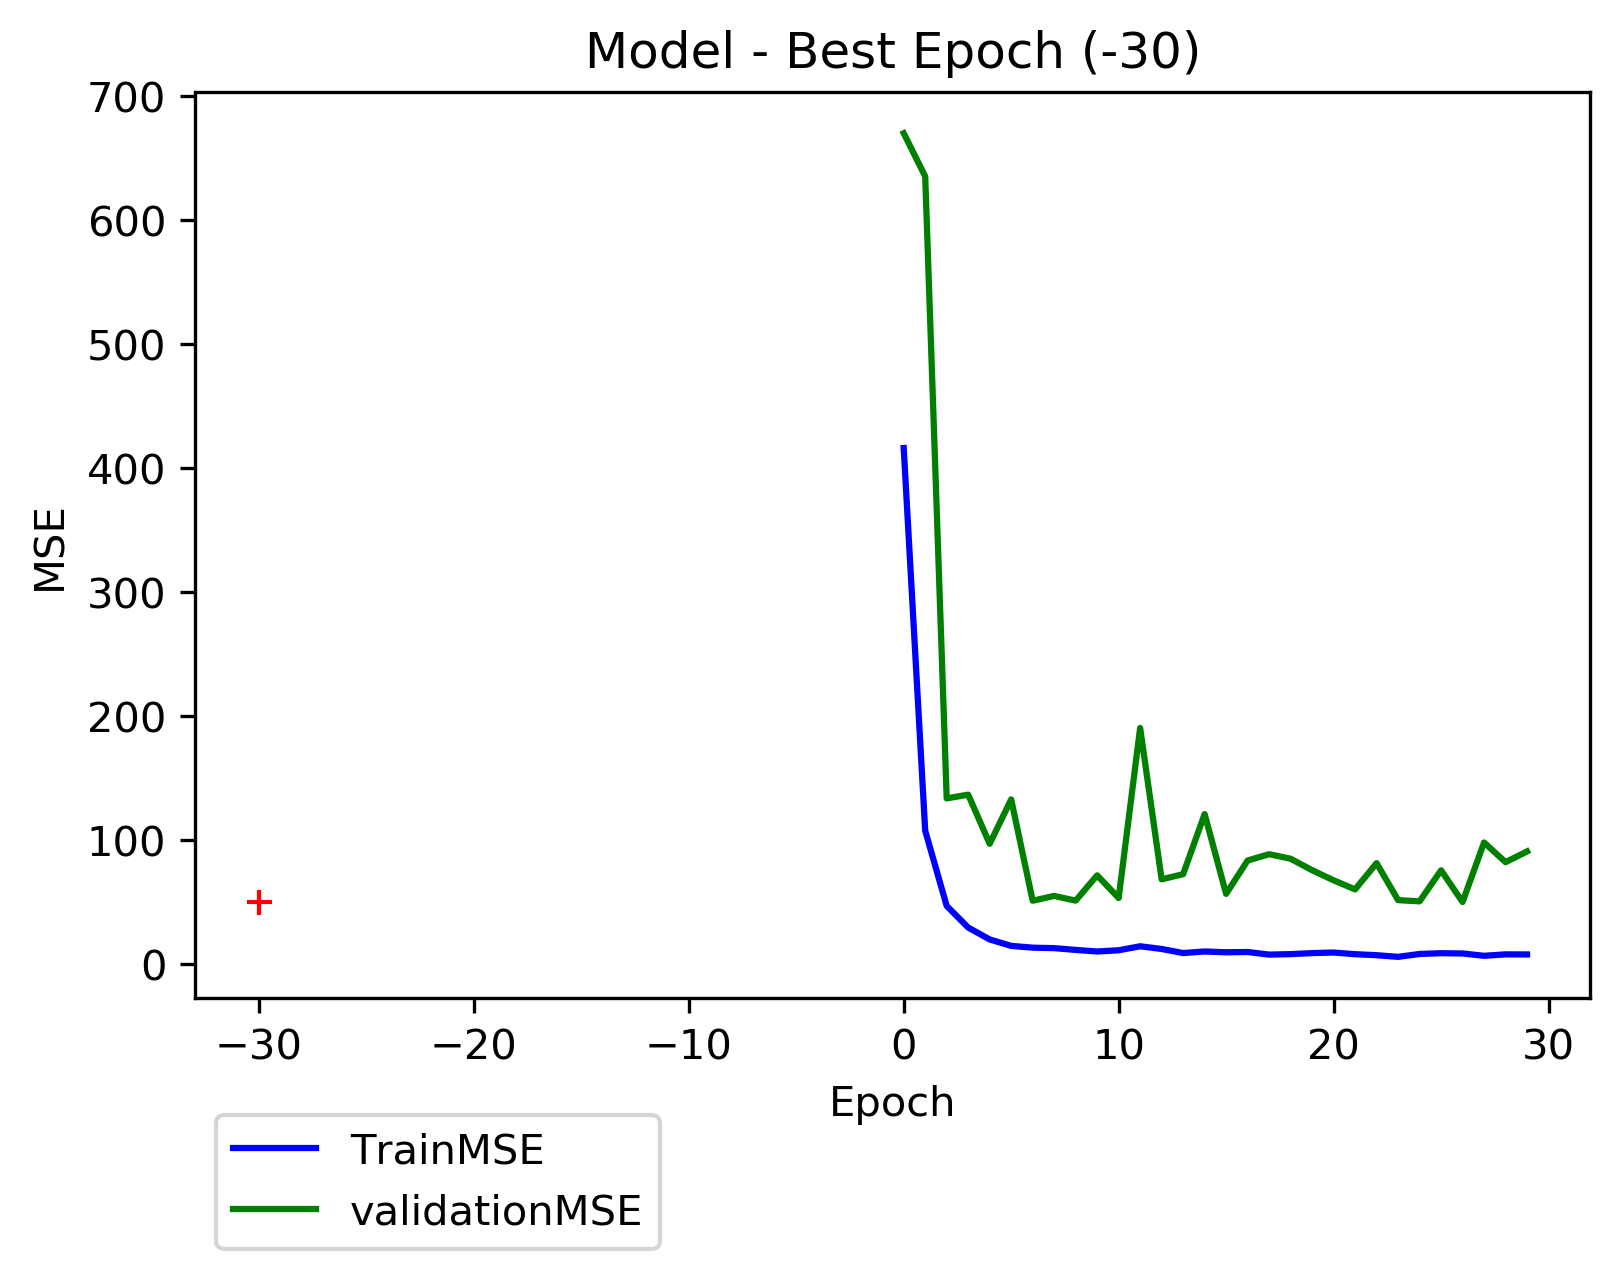

<Figure size 432x288 with 0 Axes>

In [68]:
# Plot Charts
plot_chart_to_file(earlystop.stopped_epoch - patience, earlystop.best)

In [69]:
scores_Train = model.evaluate(X_Train, Y_Train, verbose=0)
print(model.metrics_names[1], scores_Train[1])

mean_squared_error 0.9260953868006653


In [70]:
scores_Valid = model.evaluate(X_Valid,Y_Valid, verbose=0)
print(model.metrics_names[1], scores_Valid[1])

mean_squared_error 50.284075546863505


In [71]:
scores = model.evaluate(X_Test, Y_Test, verbose=0)
print(model.metrics_names[1], scores[1])

mean_squared_error 46.53408130071335


In [72]:
history.history

{'val_loss': [669.6483678978691,
  634.8640454724969,
  133.73197296238394,
  136.77528335572785,
  97.17875555807979,
  132.9624925286186,
  51.31159378557789,
  55.18633925395446,
  51.38639186951953,
  71.76224864726912,
  53.48881945533026,
  190.50929242475442,
  68.5462668829333,
  72.70558191618328,
  121.11283835986252,
  56.860779558751425,
  83.71465590254665,
  88.80137856470733,
  85.13417385848388,
  75.90425959622468,
  67.7663899581511,
  60.447536604745046,
  81.59451576641628,
  51.7928565792985,
  50.80807462124098,
  75.85199148014912,
  50.2840773711212,
  98.23098569537632,
  82.36418749511336,
  91.03379454043821],
 'val_mean_squared_error': [669.6483678978691,
  634.8640454724969,
  133.73197296238394,
  136.77528335572785,
  97.17875555807979,
  132.9624925286186,
  51.31159378557789,
  55.18633925395446,
  51.38639186951953,
  71.76224864726912,
  53.48881945533026,
  190.50929242475442,
  68.5462668829333,
  72.70558191618328,
  121.11283835986252,
  56.860779